In [264]:
import pandas as pd, io, requests
df = pd.read_excel('data.xls', sheet_name='workshop_register(8)')
df = pd.read_excel('https://www.epolicija.lt/c/document_library/get_file?uuid=3c3545cc-8c79-4a42-a865-73476367a910&amp;groupId=10156.xls', sheet_name='workshop_register(8)')
#https://www.epolicija.lt/c/document_library/get_file?uuid=3c3545cc-8c79-4a42-a865-73476367a910&amp;groupId=10156.xls



NameError: name 'printdf' is not defined

In [283]:
import matplotlib.pyplot as plt
df1 = df[['Savivaldybė','Data','Laikas','Žuvusių skaičius','Įvykio rūšis','Ar asmuo kaltas dėl eismo įvykio (1 - taip, 0 - ne)']]
df1 = df1[df['Įvykio rūšis'].notnull()]
events = df1[['Įvykio rūšis','Laikas']][df1['Įvykio rūšis'].notnull()]
events['Hour'] = events['Laikas'].apply(lambda x: x.hour)
eventBin = events.groupby(['Hour'])['Įvykio rūšis'].count().to_frame('Count').reset_index()
other = events.groupby(['Įvykio rūšis','Hour'])['Hour'].count().to_frame('Count').reset_index()
piv = other.pivot(index='Hour' ,columns='Įvykio rūšis',values='Count')
piv = piv.replace(np.nan, 0).reset_index().rename_axis(None, axis=1)
piv['HourBendras'] = eventBin['Count']
piv

,Hour,Apvirtimas,Kiti eismo įvykiai,Susidūrimas,Susidūrimas su dviračiu,Susidūrimas su mopedu,Susidūrimas su motociklu,Susidūrimas su stovinčia transporto priemone,Užvažiavimas ant gyvūno,Užvažiavimas ant kliūties,Užvažiavimas ant pėsčiojo,HourBendras
0,0,5.0,7.0,5.0,0.0,0.0,1.0,0.0,0.0,3.0,10.0,31
1,1,5.0,9.0,6.0,0.0,0.0,0.0,0.0,1.0,2.0,7.0,30
2,2,4.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12
3,3,7.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,14
4,4,5.0,4.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,15
5,5,5.0,3.0,4.0,2.0,0.0,0.0,0.0,1.0,1.0,3.0,19
6,6,3.0,7.0,23.0,3.0,0.0,0.0,0.0,4.0,1.0,15.0,56
7,7,11.0,13.0,52.0,17.0,3.0,4.0,4.0,0.0,9.0,64.0,177
8,8,10.0,19.0,50.0,23.0,0.0,0.0,1.0,1.0,2.0,47.0,153
9,9,7.0,17.0,40.0,9.0,0.0,5.0,1.0,2.0,2.0,32.0,115


Text(0, 0.5, 'Avarijų skaičius (kiekis)')

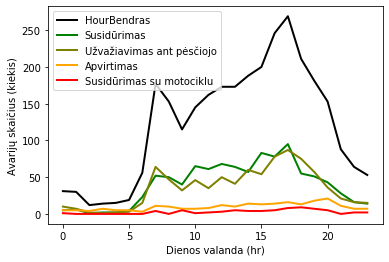

In [284]:
plt.plot( 'Hour', 'HourBendras', data=piv, marker='', color='Black', linewidth=2)
plt.plot( 'Hour', 'Susidūrimas', data=piv, marker='', color='green', linewidth=2)
plt.plot( 'Hour', 'Užvažiavimas ant pėsčiojo', data=piv, marker='', color='olive', linewidth=2)
plt.plot( 'Hour', 'Apvirtimas', data=piv, marker='', color='orange', linewidth=2)
plt.plot( 'Hour', 'Susidūrimas su motociklu', data=piv, marker='', color='red', linewidth=2)
plt.legend()
plt.xlabel('Dienos valanda (hr)')
plt.ylabel('Avarijų skaičius (kiekis)')


In [291]:
df1 = df[['Dangos rūšis','Žuvusių skaičius']]
df1 = df1[df['Dangos rūšis'].notnull()]
grouped = df1.groupby(['Dangos rūšis'])['Žuvusių skaičius'].sum().to_frame('sum').reset_index()
grouped

,Dangos rūšis,sum
0,"Asfaltbetonis, cementbetonis",162.0
1,Be dangos,2.0
2,Grindinys,0.0
3,Žvyrkelis,9.0


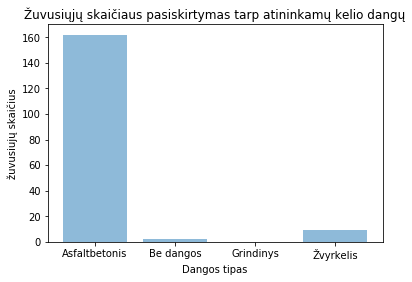

In [312]:
plt.bar(grouped['Dangos rūšis'],grouped['sum'] , align='center', alpha=0.5)
plt.xticks((0,1,2,3),('Asfaltbetonis','Be dangos','Grindinys','Žvyrkelis'))
plt.ylabel('žuvusiujų skaičius')
plt.xlabel('Dangos tipas')
plt.title('Žuvusiųjų skaičiaus pasiskirtymas tarp atininkamų kelio dangų')
plt.show()

In [322]:
df1 = df[['Vairavimo stažas metais','Ar asmuo kaltas dėl eismo įvykio (1 - taip, 0 - ne)']]
df1 = df1[df['Vairavimo stažas metais'].notnull()]
grouped = df1.groupby(['Vairavimo stažas metais'])['Ar asmuo kaltas dėl eismo įvykio (1 - taip, 0 - ne)'].sum().to_frame('sum').reset_index()
grouped1 = df1.groupby(['Vairavimo stažas metais'])['Ar asmuo kaltas dėl eismo įvykio (1 - taip, 0 - ne)'].count().to_frame('count').reset_index()
grouped['count'] = grouped1['count'] 
grouped['santykis'] = np.divide(grouped['sum'], grouped['count'])

grouped

,Vairavimo stažas metais,sum,count,santykis
0,0.0,147.0,213,0.690141
1,1.0,133.0,245,0.542857
2,2.0,103.0,175,0.588571
3,3.0,81.0,133,0.609023
4,4.0,54.0,99,0.545455
...,...,...,...,...
59,60.0,2.0,4,0.500000
60,61.0,1.0,1,1.000000
61,62.0,0.0,1,0.000000
62,63.0,1.0,1,1.000000


Text(0, 0.5, 'santykis')

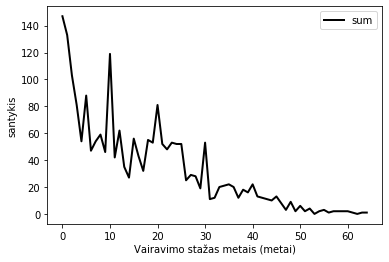

In [325]:
plt.plot( 'Vairavimo stažas metais', 'sum', data=grouped, marker='', color='Black', linewidth=2)
plt.legend()
plt.xlabel('Vairavimo stažas metais (metai)')
plt.ylabel('Avarijų skaičius')

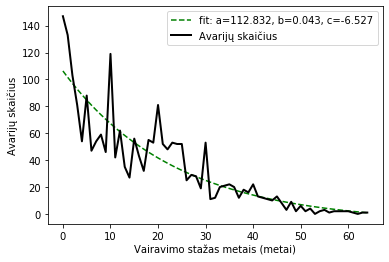

In [372]:
# soruce : https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
from scipy.optimize import curve_fit
def func(x, a, b, c): return a * np.exp(-b * x) + c
popt, pcov = curve_fit(func,  grouped['Vairavimo stažas metais'],  grouped['sum'])
plt.plot(grouped['Vairavimo stažas metais'], func(grouped['Vairavimo stažas metais'],*popt), 'g--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot('Vairavimo stažas metais', 'sum', label='Avarijų skaičius', data=grouped, marker='', color='Black', linewidth=2)
plt.xlabel('Vairavimo stažas metais (metai)')
plt.ylabel('Avarijų skaičius')
plt.legend()
plt.show()

SyntaxError: unexpected EOF while parsing (<ipython-input-334-a1e2fa76e108>, line 1)